In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
import sys
sys.path.insert(0,'/Users/megret/Documents/Research/BeeTracking/Soft/labelbeeconvert')
#sys.path.insert(0,'/Users/megret/Documents/Research/BeeTracking/Soft/apriltag/swatbotics-apriltag/python/')
from labelbeeconvert import labelbee_convert as lb

In [4]:
cd '/Users/megret/Documents/Research/BeeTracking/Soft/labelbeeconvert/data/drive-download-20181001'

/Users/megret/Documents/Research/BeeTracking/Soft/labelbeeconvert/data/drive-download-20181001


In [5]:
#ls

In [6]:
#ls ..

In [7]:
evts=lb.load_fileset('../inputlist_new.csv','drive-download-20181001')
#evts=lb.load_fileset('../inputlist.csv','drive-download-20181001')

Loading C02_170620080000-Tracks-20180922_161322 - Patricia A Arsuaga Hernandez.json...
Loading C02_170620090000-Tracks-20180801_150419 - Edwin M Caraballo Sanchez.json...
Loading C02_170620100000-Tracks-20180731_163951 - Edwin J Rivera Colon.json...
Loading C02_170620110000-Tracks-20180731_005651-Luis S. Gonzalez - Luis Gonzalez Medina.json...
Loading C02_170620120000-Tracks-20180730_150118 - Isada Claudio Ford.json...
Loading C02_170620130000-Tracks-20180730_213708 - Ivan D Collado Hernandez.json...
Loading C02_170620150000-Tracks-20180731_103723 - Patricia A Arsuaga Hernandez.json...
Loading C02_170620160000-Tracks-20180615_130945 - Jhoniel Perez Perez.json...
Loading C02_170620170000-Tracks-20180901_222052 - Edwin M Caraballo Sanchez.json...
Loading C02_170620180000-Tracks-20180801_104539 - Edwin J Rivera Colon.json...
Loading C02_170621070000-Tracks-20180918_105028 - Claudia Sofia Cordero Martinez.json...
Loading C02_170621080000-Tracks-20180922_150626 - Claudia Sofia Cordero Marti

In [8]:
E = evts[['video', 'datetime', 'date', 'time', 'frame', 'id', 'labels', 'leaving', 'entering', 'pollen', 'walking',
             'fanning', 'falsealarm', 'wrongid' ]].copy()
E = E.query('falsealarm!=True & wrongid!=True').copy()
cols=['leaving','entering','pollen','walking','fanning','falsealarm','wrongid']
E[cols]=E[cols].astype('int')
E=E.drop(['falsealarm', 'wrongid'], axis=1)
E.head()

,video,datetime,date,time,frame,id,labels,leaving,entering,pollen,walking,fanning
4,C02_170620080000,2017-06-20 08:00:26.250,2017-06-20,08:00:26.250000,525,183,,0,0,0,0,0
30,C02_170620080000,2017-06-20 08:09:27.950,2017-06-20,08:09:27.950000,11359,197,entering,0,1,0,0,0
31,C02_170620080000,2017-06-20 08:09:27.950,2017-06-20,08:09:27.950000,11359,661,entering,0,1,0,0,0
32,C02_170620080000,2017-06-20 08:09:28.100,2017-06-20,08:09:28.100000,11362,1014,entering,0,1,0,0,0
34,C02_170620080000,2017-06-20 08:10:39.500,2017-06-20,08:10:39.500000,12790,1652,entering,0,1,0,0,0


In [15]:
E.to_csv('../170620-170627.csv')

In [9]:
cols=['leaving','entering','pollen','walking','fanning','falsealarm','wrongid']
evts[cols]=evts[cols].astype('bool')
evts.head()

,frame,id,labels,leaving,entering,pollen,walking,fanning,falsealarm,wrongid,datetime,date,time,video
0,1,371,wrongid,False,False,False,False,False,False,True,2017-06-20 08:00:00.050,2017-06-20,08:00:00.050000,C02_170620080000
1,5,15,wrongid,False,False,False,False,False,False,True,2017-06-20 08:00:00.250,2017-06-20,08:00:00.250000,C02_170620080000
2,224,1275,wrongid,False,False,False,False,False,False,True,2017-06-20 08:00:11.200,2017-06-20,08:00:11.200000,C02_170620080000
3,233,425,wrongid,False,False,False,False,False,False,True,2017-06-20 08:00:11.650,2017-06-20,08:00:11.650000,C02_170620080000
4,525,183,,False,False,False,False,False,False,False,2017-06-20 08:00:26.250,2017-06-20,08:00:26.250000,C02_170620080000


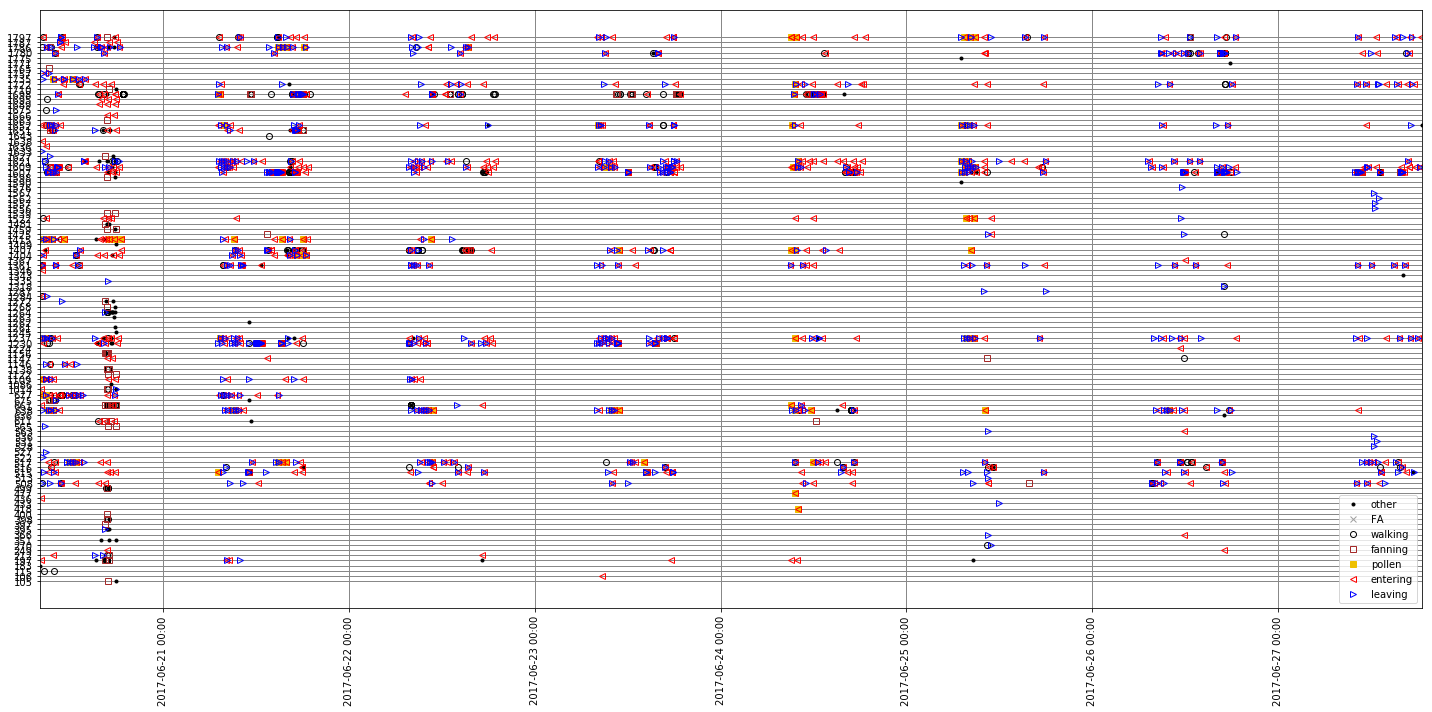

In [10]:
fig = plt.subplots(1,1,figsize=(20,10))
#plt.plot(evts['frame'],evts['id'],'o')
evts_val = evts.query('falsealarm!=True & wrongid!=True & id<1800 &id>90 & not(id>700 & id<1000)').copy()
evts_val.index = range(evts_val.shape[0])
evts_val.reindex()
lb.plot_activities(evts_val);
plt.tight_layout();

In [61]:
# Remove FA and WId, keep only entering/leaving
cleaned = evts.query('falsealarm!=True & wrongid!=True')
# Remove bees with less than 4 events
evts_filtered = cleaned.groupby('id').filter(lambda x: len(x) >= 4).copy()
ids=evts_filtered['id'].unique()
print(ids.shape, ' kept ids')

evts_walking = evts_filtered.query('falsealarm!=True & wrongid!=True & (walking)')
evts_fanning = evts_filtered.query('falsealarm!=True & wrongid!=True & (fanning)')
evts_foraging = evts_filtered.query('falsealarm!=True & wrongid!=True & (entering | leaving)')

#evts_val = filtered.query('falsealarm!=True & wrongid!=True & id<1800 &id>90 & not(id>700 & id<1000)').copy()
#evts_val.index = range(evts_val.shape[0])
#evts_val.reindex();

(84,)  kept ids


/Users/megret/anaconda/envs/bnl/lib/python3.5/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/Users/megret/anaconda/envs/bnl/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/megret/anaconda/envs/bnl/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

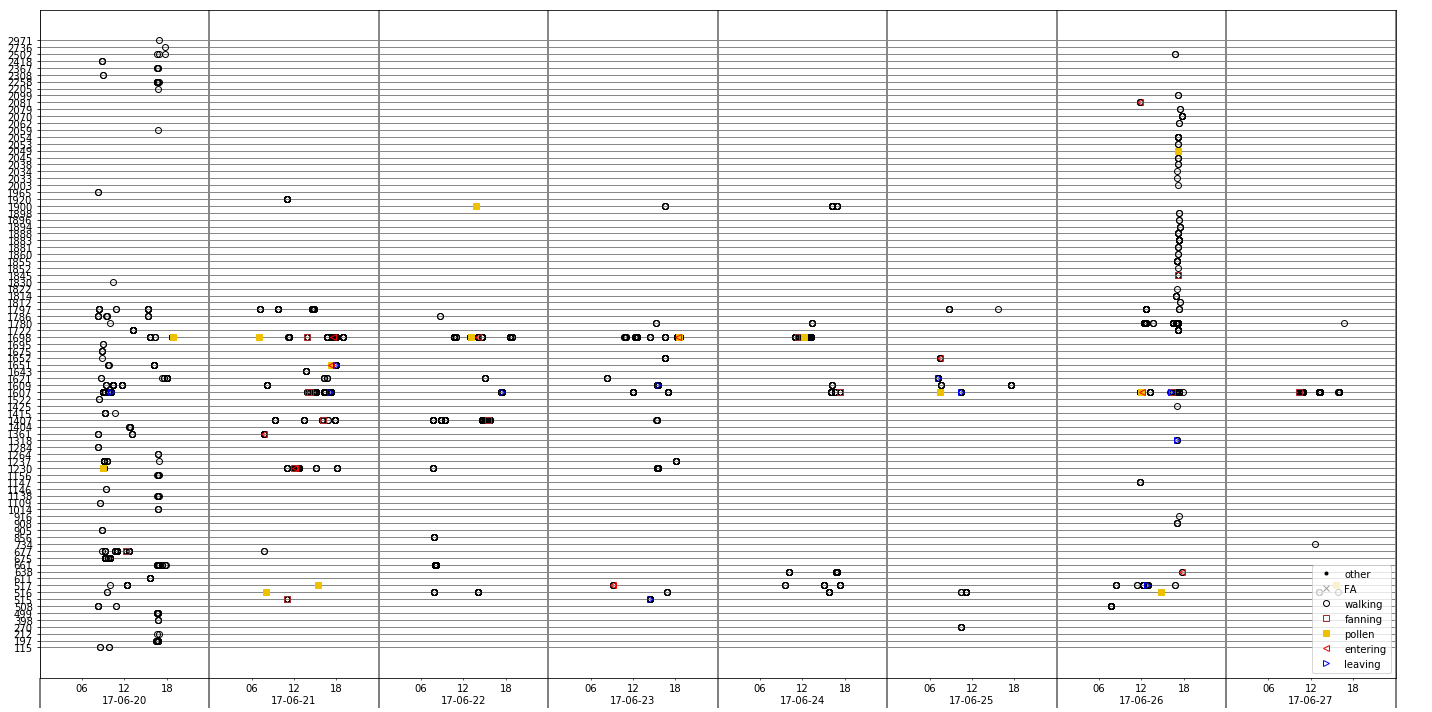

In [29]:
import matplotlib.dates as dates
import matplotlib.ticker as ticker

fig = plt.subplots(1,1,figsize=(20,10))
#plt.plot(evts['frame'],evts['id'],'o')

# Remove FA and WId, keep only entering/leaving
cleaned = evts.query('falsealarm!=True & wrongid!=True & (entering | leaving)')
evts_walking = evts.query('falsealarm!=True & wrongid!=True & (walking)')

# Remove bees with less than 4 events
evts_val = cleaned.groupby('id').filter(lambda x: len(x) >= 4).copy()

#evts_val = filtered.query('falsealarm!=True & wrongid!=True & id<1800 &id>90 & not(id>700 & id<1000)').copy()
evts_val.index = range(evts_val.shape[0])
evts_val.reindex()

#lb.plot_activities(evts_val);
lb.plot_activities(evts_walking);

plt.xlim(pd.to_datetime('2017-06-20 00:00'),pd.to_datetime('2017-06-28 00:00'))

def format_multiday():
    ax=plt.gca()
    def format_date(x, pos=None):
        d=dates.num2date(x)
        if d.hour==12:
            return d.strftime('%H\n%y-%m-%d')
        else:
            return d.strftime('%H')
    ax.xaxis.set_major_locator(dates.HourLocator([0]))
    ax.xaxis.set_minor_locator(dates.HourLocator([6,12,18]))
    #ax.xaxis.set_major_formatter(dates.DateFormatter('%y-%m-%d'))
    #ax.xaxis.set_minor_formatter(dates.DateFormatter('%H'))
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.xaxis.set_minor_formatter(ticker.FuncFormatter(format_date))
    plt.legend(loc=4)
    #plt.xticks(pd.date_range('2017-06-21 00:00','2017-06-27 00:00'),rotation=0)
    plt.xticks(horizontalalignment="left")
    ax.tick_params('x', length=30, width=2, which='major',color='gray')

    import matplotlib.transforms
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=0) 

    ax.grid(b=True, which='major', axis='x', linewidth=2)

    # Create offset transform by 5 points in x direction
    dx = 5/72.; dy = 15/72. 
    fig = plt.gcf()
    offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

    # apply offset transform to all x ticklabels.
    for label in ax.xaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + offset)

    plt.tight_layout();

format_multiday()

In [13]:
#evts_val.set_index('datetime', drop=False, inplace=True)
#d=evts_val.groupby(['id',pd.Grouper(freq='1h')]).count()
d = evts_val.copy()

In [70]:
d=cleaned.copy()
ids = d['id'].unique()
revmap={}
for i,id in enumerate(ids):
    revmap[id]=i
d['k'] = d['id'].map(lambda i:revmap[i])

In [79]:
ids = evts_foraging['id'].unique()
print(len(ids),' ids')
def quant(evts, ids):
    d = evts.copy()
    #d=d.reset_index()
    #times = e['datetime'].unique()
    #ids = d['id'].unique()
    revmap={}
    for i,id in enumerate(ids):
        revmap[id]=int(i)
    
    dates=pd.date_range('2017-06-20', periods=8*24, freq='1H')

    def domap(i):
        if (i in ids): 
            return revmap[i]; 
        else: 
            return np.nan
    
#    d['k'] = d['id'].astype('category').cat.codes
    d['k'] = d['id'].map(domap)
    d['l'] = pd.cut(d['datetime'],dates,labels=range(len(dates)-1)).astype('int')
    #e.plot.line('datetime','id',style='.')

    A=np.zeros((len(ids),len(dates)))
    for _,item in d.iterrows():
        if (np.isnan(item['k'])): continue
        A[int(item['k']),item['l']]=1
    return A,ids
        
A_fanning,ids=quant(evts_fanning, ids)
A_walking,ids=quant(evts_walking, ids)
A_foraging,ids=quant(evts_foraging, ids)

56  ids


In [80]:
A_fanning.shape

(56, 192)

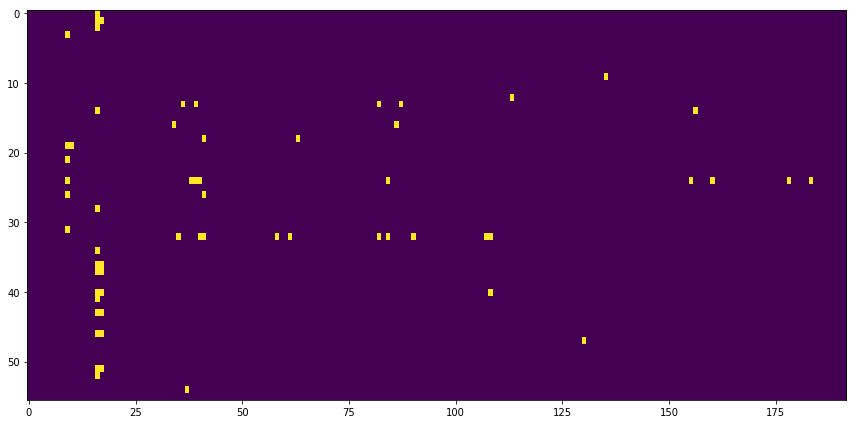

In [81]:
plt.figure(figsize=(12,6))
plt.imshow(A_fanning)
plt.axis('auto')
plt.tight_layout()

In [113]:
import skimage.io

def plotA(A, basename, ids):
    N=A.shape[0]
    B=A.reshape((N,8,24))
    
    for k in range(B.shape[0]):
        #skimage.io.imsave(basename+'-'+str(k)'+.png',B[k])
        np.savetxt(basename+'-'+str(ids[k])+'.csv', B[k], delimiter=",", fmt='%i') 

    ks=[]
    c=[]
    for i,b in enumerate(B):
        if (sum(b.ravel())>1): 
            ks.append(i)
            c.append(sum(b.ravel()))
    kk=np.argsort(np.array(c))
    kk=kk[::-1]
    ks=np.array(ks)
    
    kk=np.array(range(N))
    ks=np.array(range(N))

    nx=8
    fig,ax=plt.subplots((len(ks)+nx-1)//nx,nx,figsize=(20,12))
    ax=ax.ravel()
    for i,k in enumerate(ks[kk]):
        b=B[k]
        plt.sca(ax[i])
        plt.imshow(b)
        plt.axis('auto')
        plt.title(ids[i])
    plt.tight_layout()

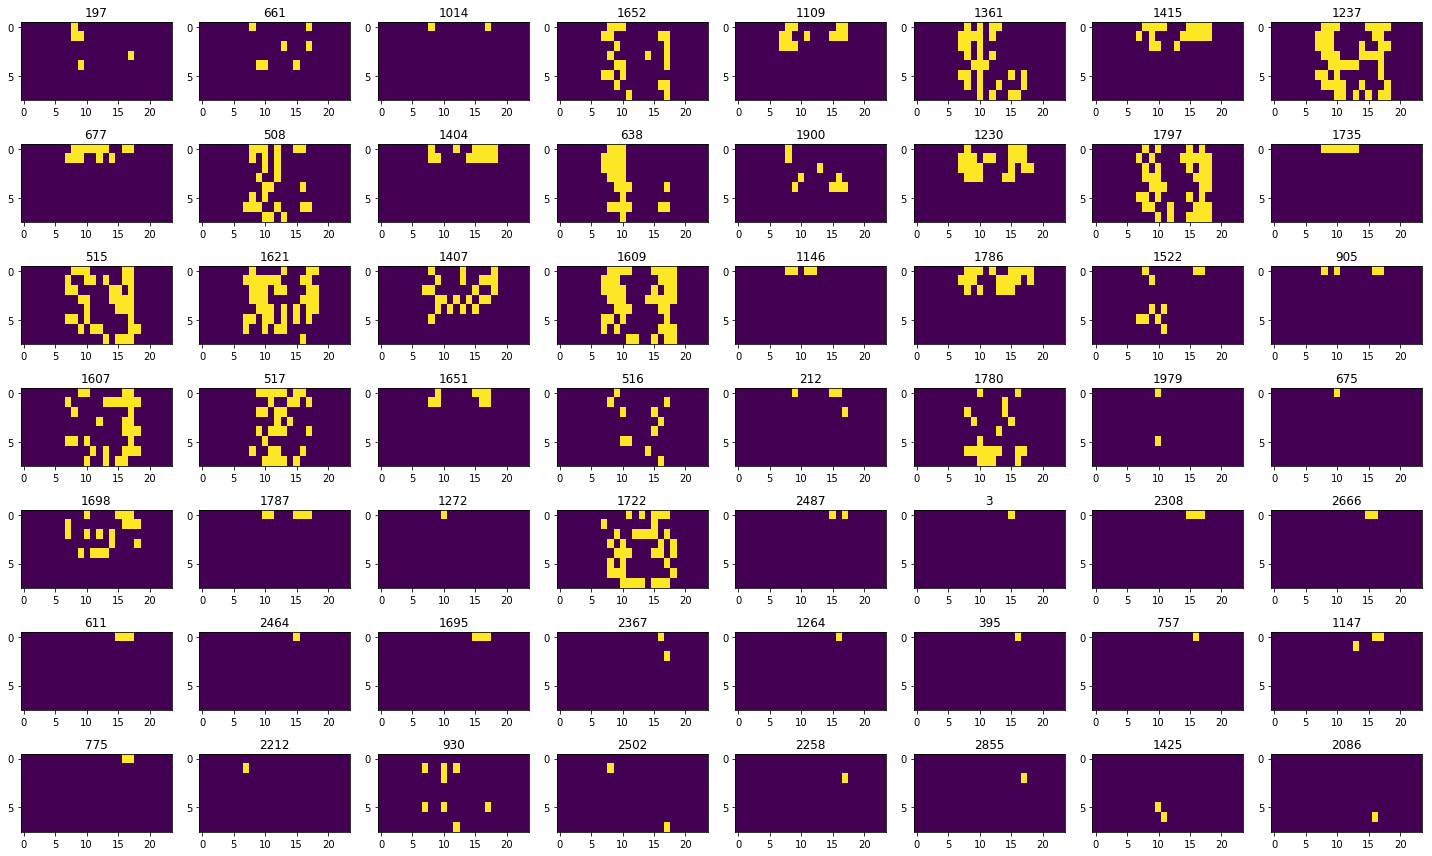

In [114]:
plotA(A_foraging, '../images/foraging', ids)

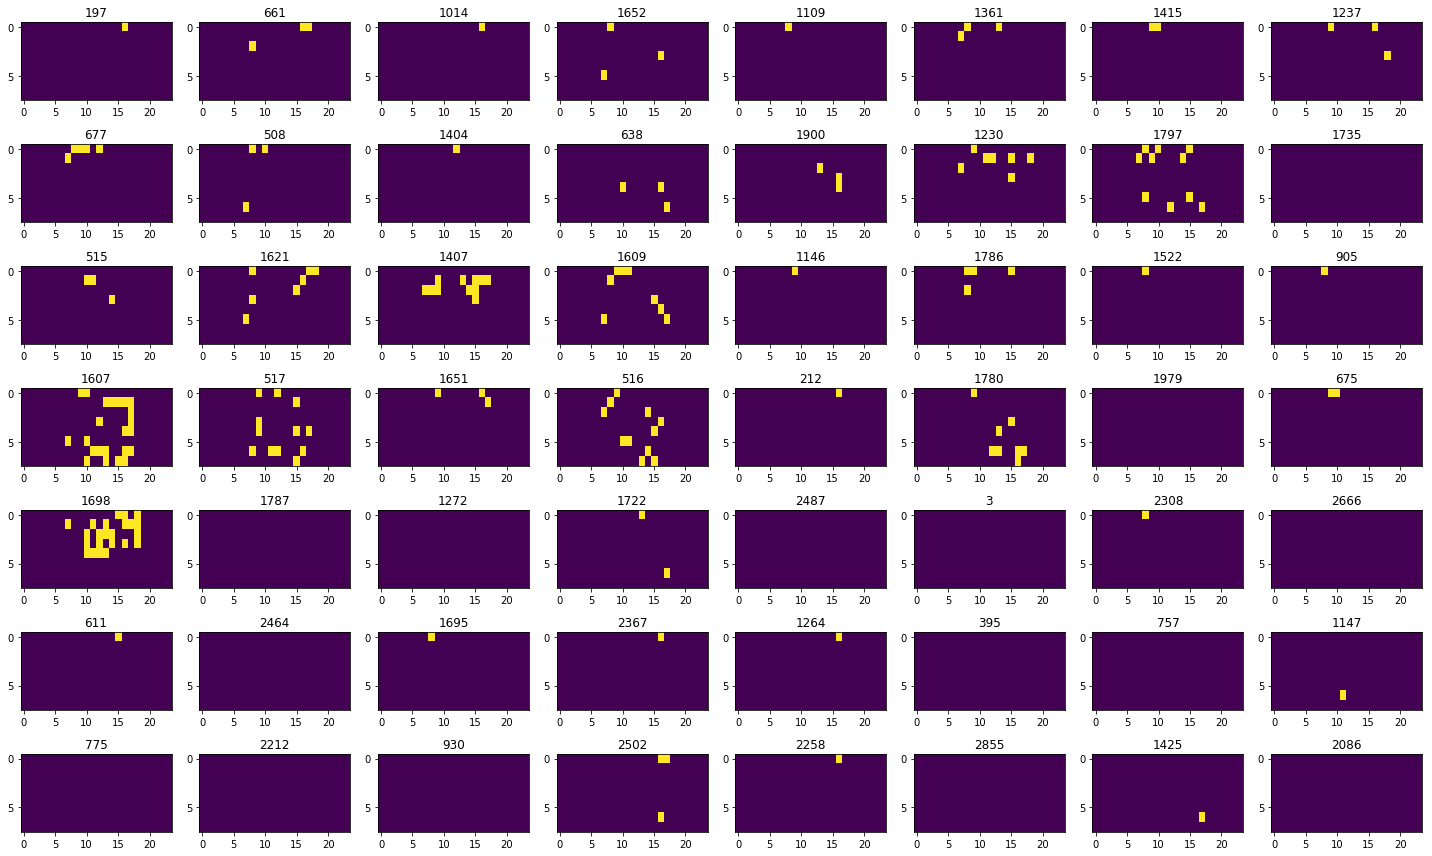

In [115]:
plotA(A_walking, '../images/walking', ids)

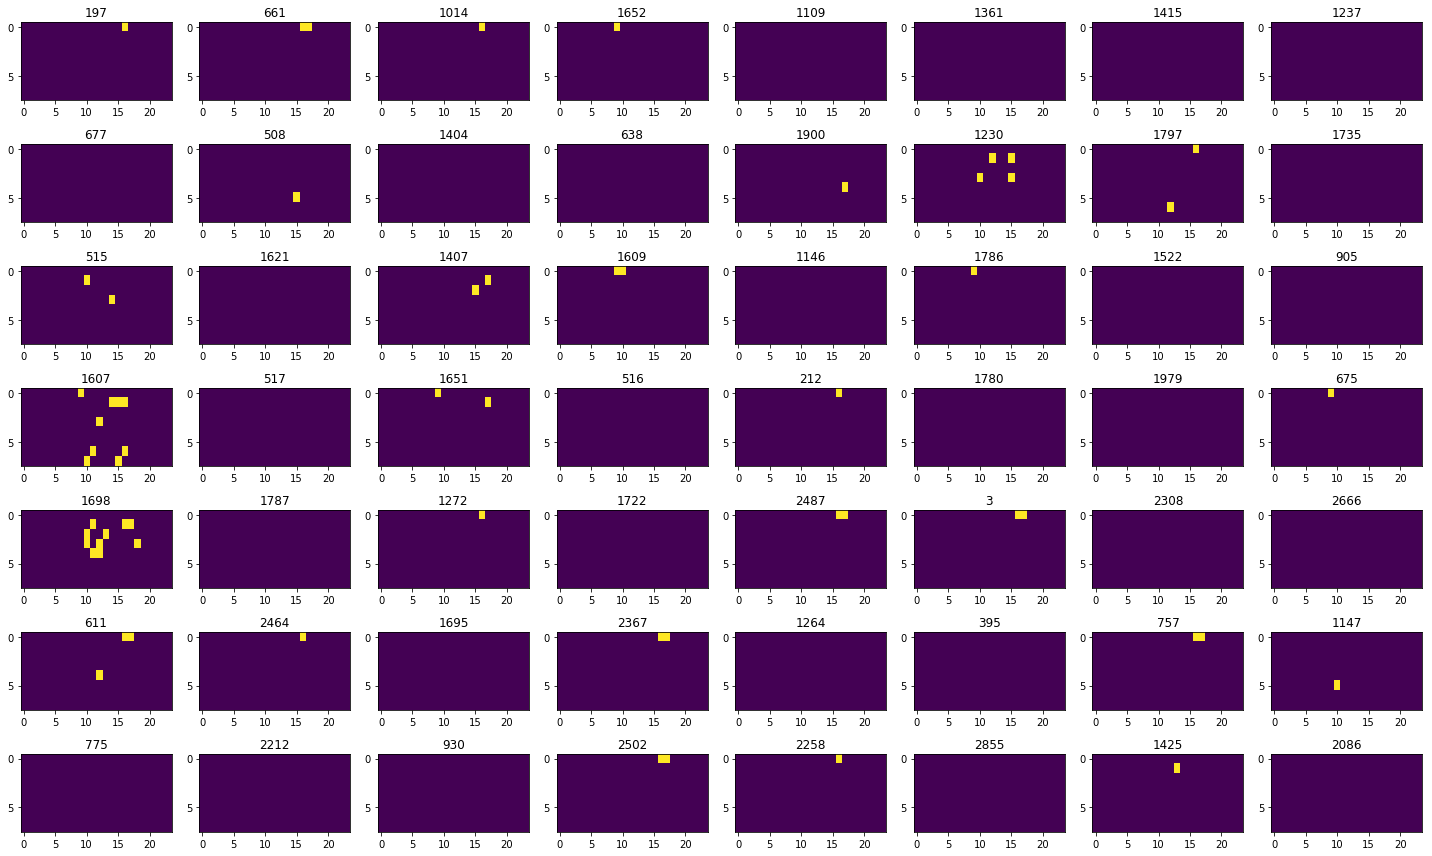

In [116]:
plotA(A_fanning, '../images/walking', ids)